In [1]:
import h5py as h5;
import numpy as np;
import matplotlib.pyplot as plt;

In [57]:
filedir = '/sdata/noise/'
#filename = 'ADCNoise_All_Terminated_FS_I0_D20200829_T130503_F0001.hdf5'
filename = 'ADCNoise_GS_I0_D20200829_T142909_F0001.hdf5'
filename = 'ADCXTalk_TrigCont_I0_D20200829_T142125_F0001.hdf5'
filename = 'ADCXTalk_TrigCont_GS_I0_D20200829_T142703_F0001.hdf5'

file = h5.File( filedir+filename )
print( file.attrs['comment'] )

ch_indices = file['adc1'].attrs['adc_channel_indices']
nb_samples = file['adc1'].attrs['nb_samples']
nb_events = file['adc1'].attrs['nb_events']
sample_rate = file['adc1'].attrs['sample_rate']
cal = file['adc1'].attrs['adc_conversion_factor']

b'ADC cross-talk characterization. All channels terminated with BNC 50 Ohm except channel 7 with 75 Ohm. The switch on all channels are at GS. Sine signal input to the PFI0 terminal with 1 kHz frequency and ~5 V amplitude. Enabling external trigger input. '


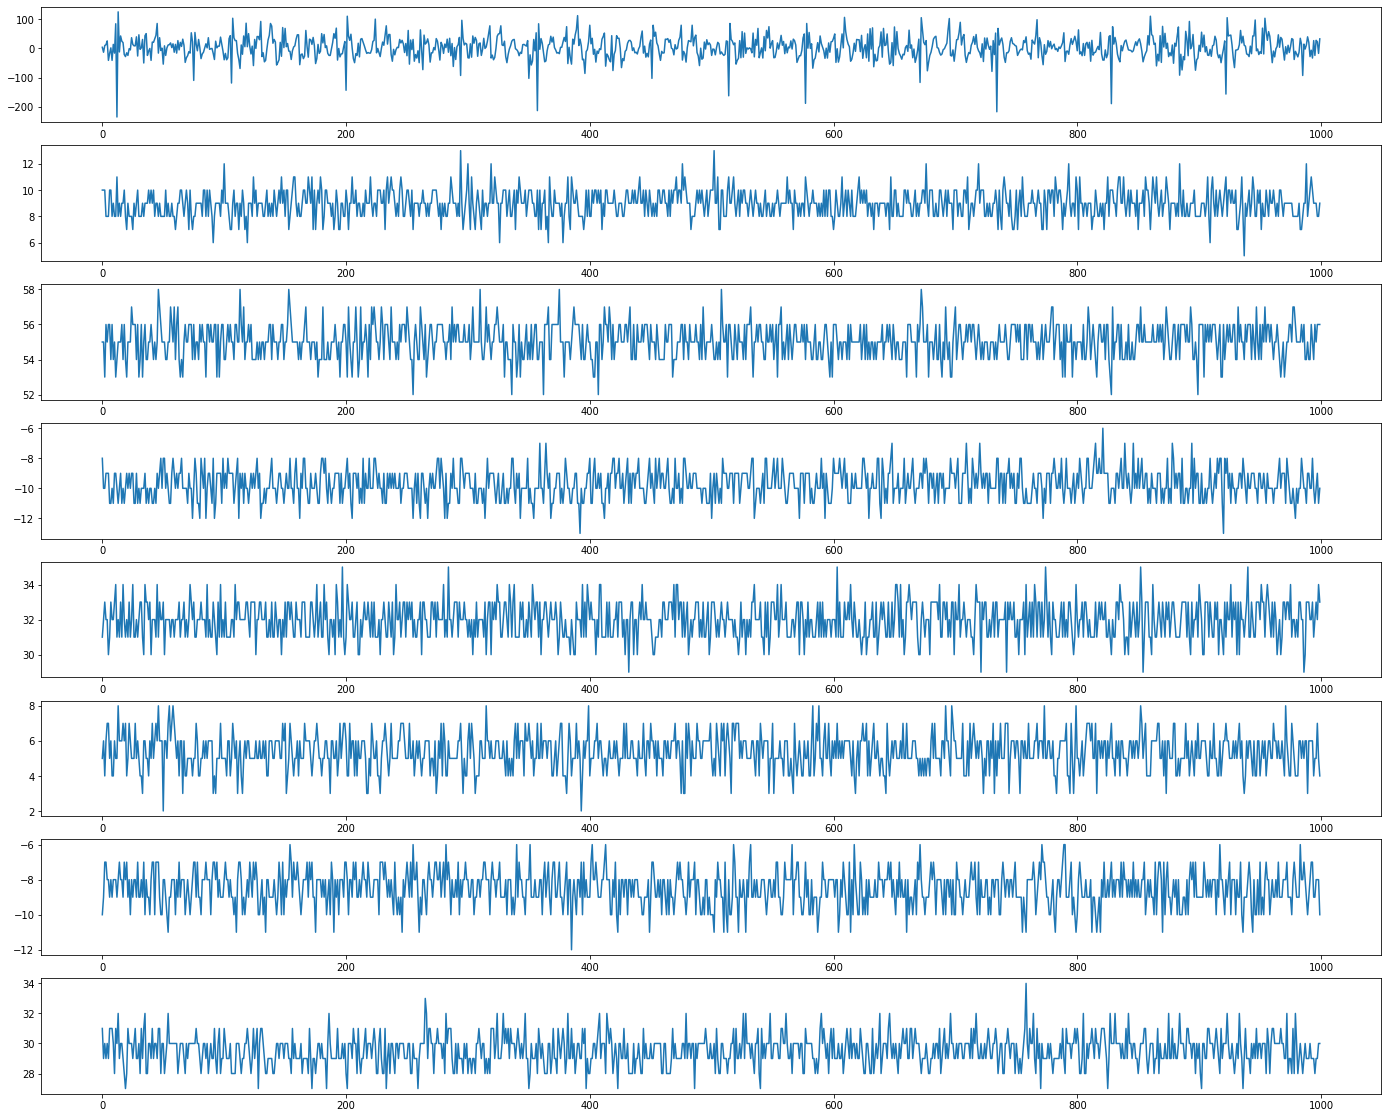

In [58]:
evt_index = 1

fig, axs = plt.subplots(8, figsize=(24,20))

for ch_index in np.arange(0,8):
    event_name = 'event_%d' % evt_index
    event = file['adc1'][event_name][ch_index][:1000]

    axs[ch_index].plot( event )

In [60]:
evt_index = 1

#fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(24,20))
#axs = ax.flatten()

hist = {}
bins = np.arange(-100,101)

for ch_index in np.arange(0,8):
    event_name = 'event_%d' % evt_index
    event = file['adc1'][event_name][ch_index]
    hist[ch_index],_ = np.histogram( event, bins)
    print( '%.6f' % np.std(event) )

#axs[ch_index].plot( event )

36.193265
1.024075
1.021441
1.030092
1.016739
1.024599
1.049422
1.032733


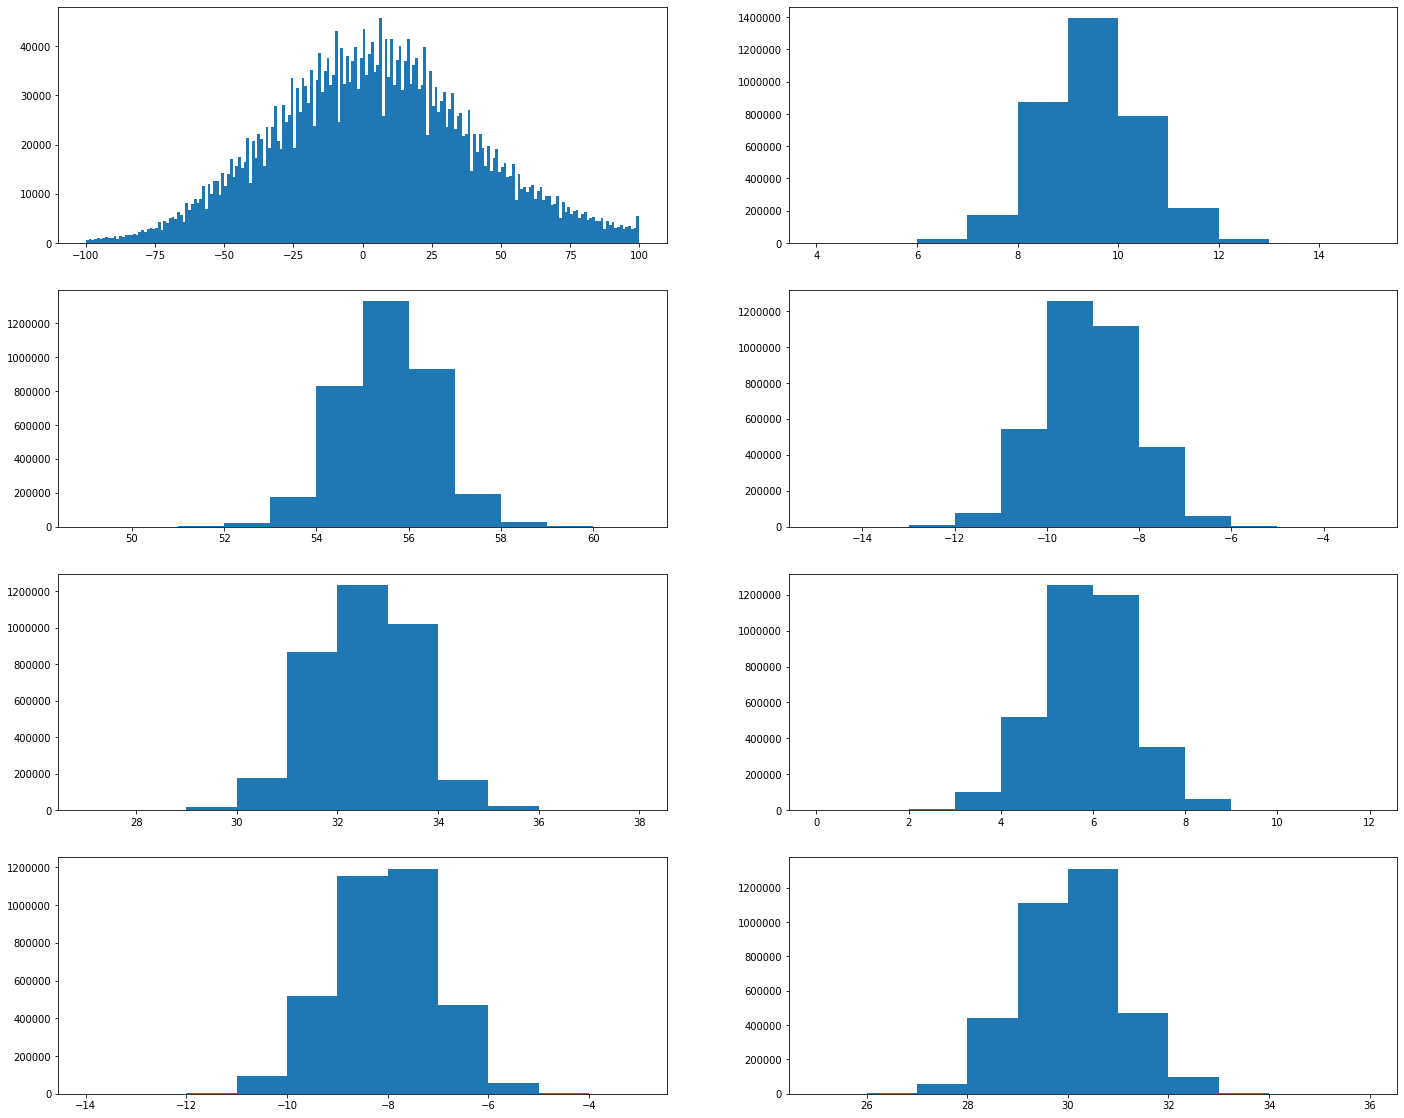

In [47]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(24,20))
axs = ax.flatten()

for ch_index in np.arange(0,8):
    axs[ch_index].bar( (bins[1:]-0.5)[ hist[ch_index]>0 ], hist[ch_index][ hist[ch_index]>0 ], width=1 )

In [56]:
file.close()

In [132]:
#
# Cross talk between different channels
#

file.close()

filedir = '/sdata/noise/'
filename = 'ADCXTalk_TrigCont_GS_I0_D20200829_T142703_F0001.hdf5'
file = h5.File( filedir+filename )
print( file.attrs['comment'] )

ch_indices = file['adc1'].attrs['adc_channel_indices']
nb_samples = file['adc1'].attrs['nb_samples']
nb_events = file['adc1'].attrs['nb_events']
sample_rate = file['adc1'].attrs['sample_rate']
cal = file['adc1'].attrs['adc_conversion_factor']

b'ADC cross-talk characterization. All channels terminated with BNC 50 Ohm except channel 7 with 75 Ohm. The switch on all channels are at GS. Sine signal input to the PFI0 terminal with 1 kHz frequency and ~5 V amplitude. Enabling external trigger input. '


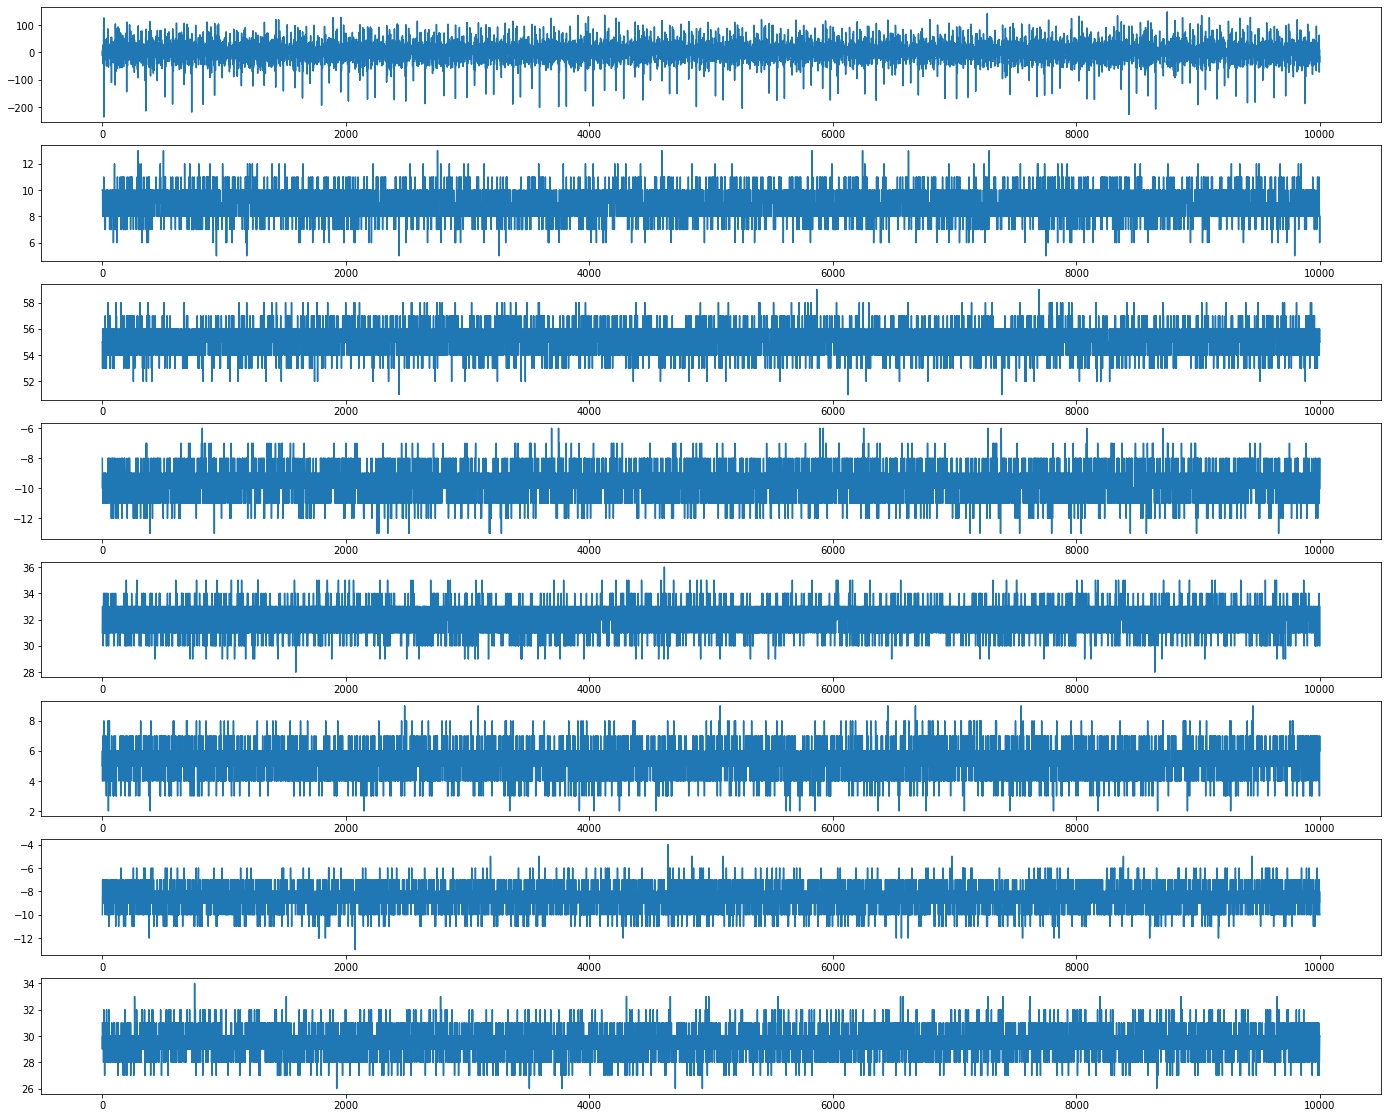

In [133]:
evt_index = 1

fig, axs = plt.subplots(8, figsize=(24,20))

for ch_index in np.arange(0,8):
    event_name = 'event_%d' % evt_index
    event = file['adc1'][event_name][ch_index][:10000]

    axs[ch_index].plot( event )

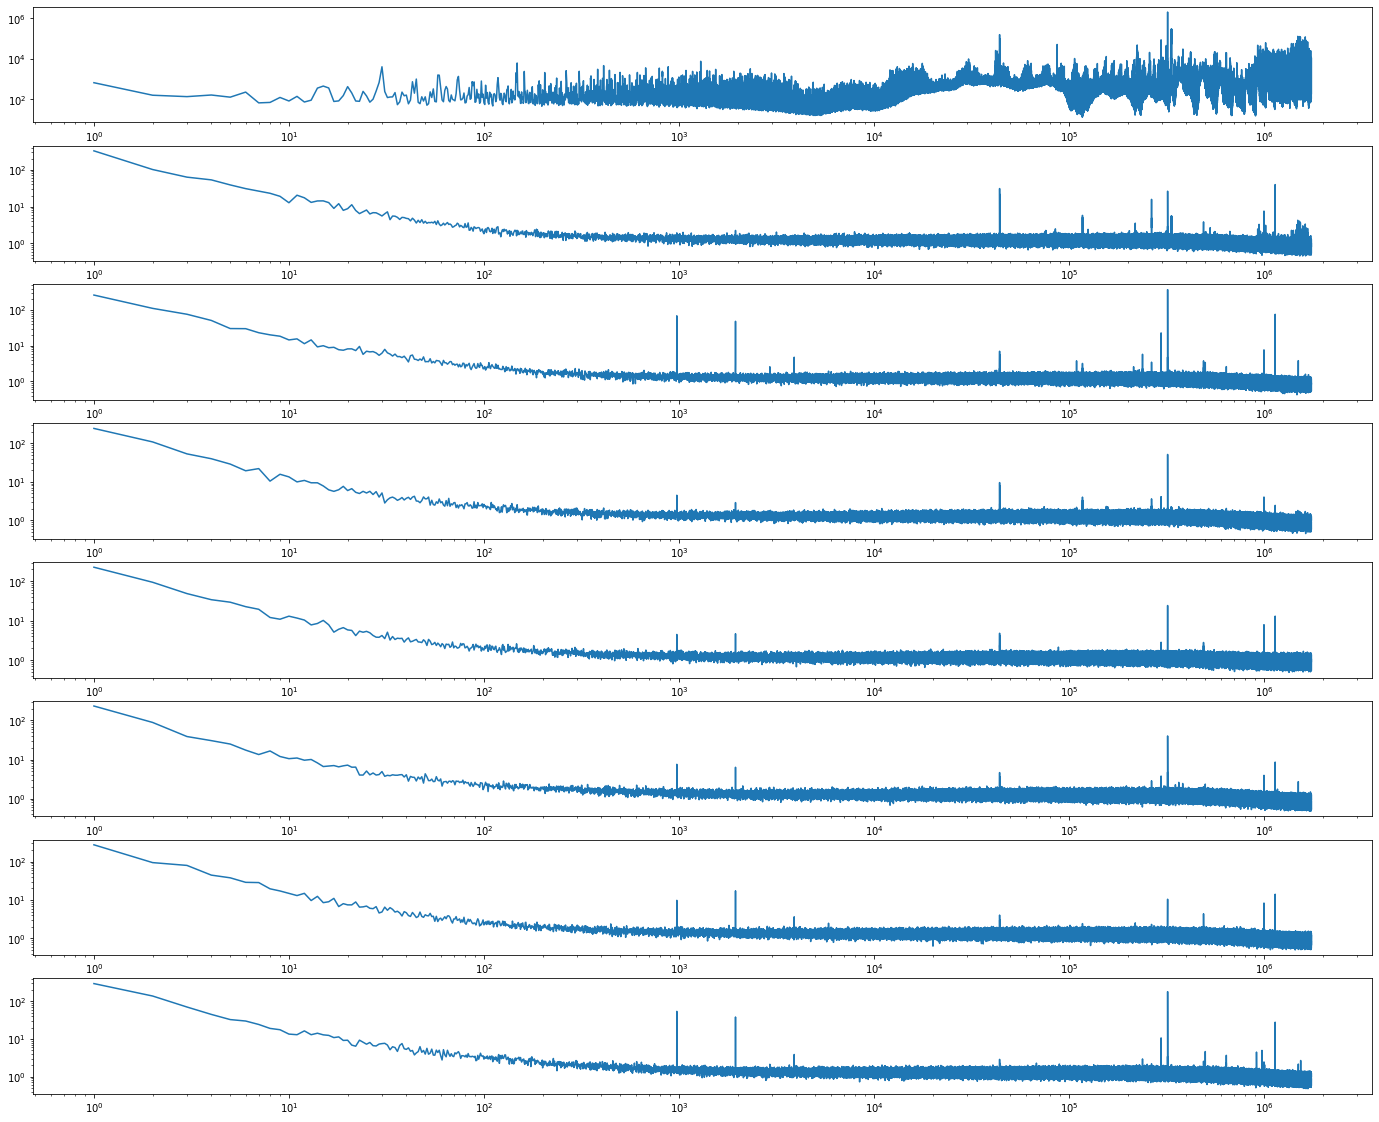

In [134]:
psd = {}

time = np.linspace( 0, nb_samples/sample_rate, nb_samples)
freq = np.fft.fftfreq( n=t.shape[-1], d=1./sample_rate)
freq_bin = freq[1]-freq[0]

Vfreq = {}
Vf = []


fig, axs = plt.subplots(8, figsize=(24,20))


for ch_index in np.arange(0,8):
    
    counter = 0;
    
    for evt_index in range( 1, nb_events+1 ):
        event_name = 'event_%d' % evt_index
        event = file['adc1'][event_name][ch_index]
        
        if counter==0:
            Vf = ( np.abs(np.fft.fft(event))**2 ) /freq_bin/nb_samples
                # divide by frequency bin width and number of samples to normalize.
        else:
            Vf += ( np.abs(np.fft.fft(event))**2 ) /freq_bin/nb_samples
        
        counter += 1
        
    Vfreq[ch_index] = Vf/counter
    
    axs[ch_index].semilogx()
    axs[ch_index].semilogy()
    axs[ch_index].plot( freq[freq>0], Vfreq[ch_index][freq>0] )

2.71209e+03
2.00380e+00
6.93569e+01
4.45863e+00
4.50092e+00
7.54786e+00
9.80220e+00
5.40461e+01


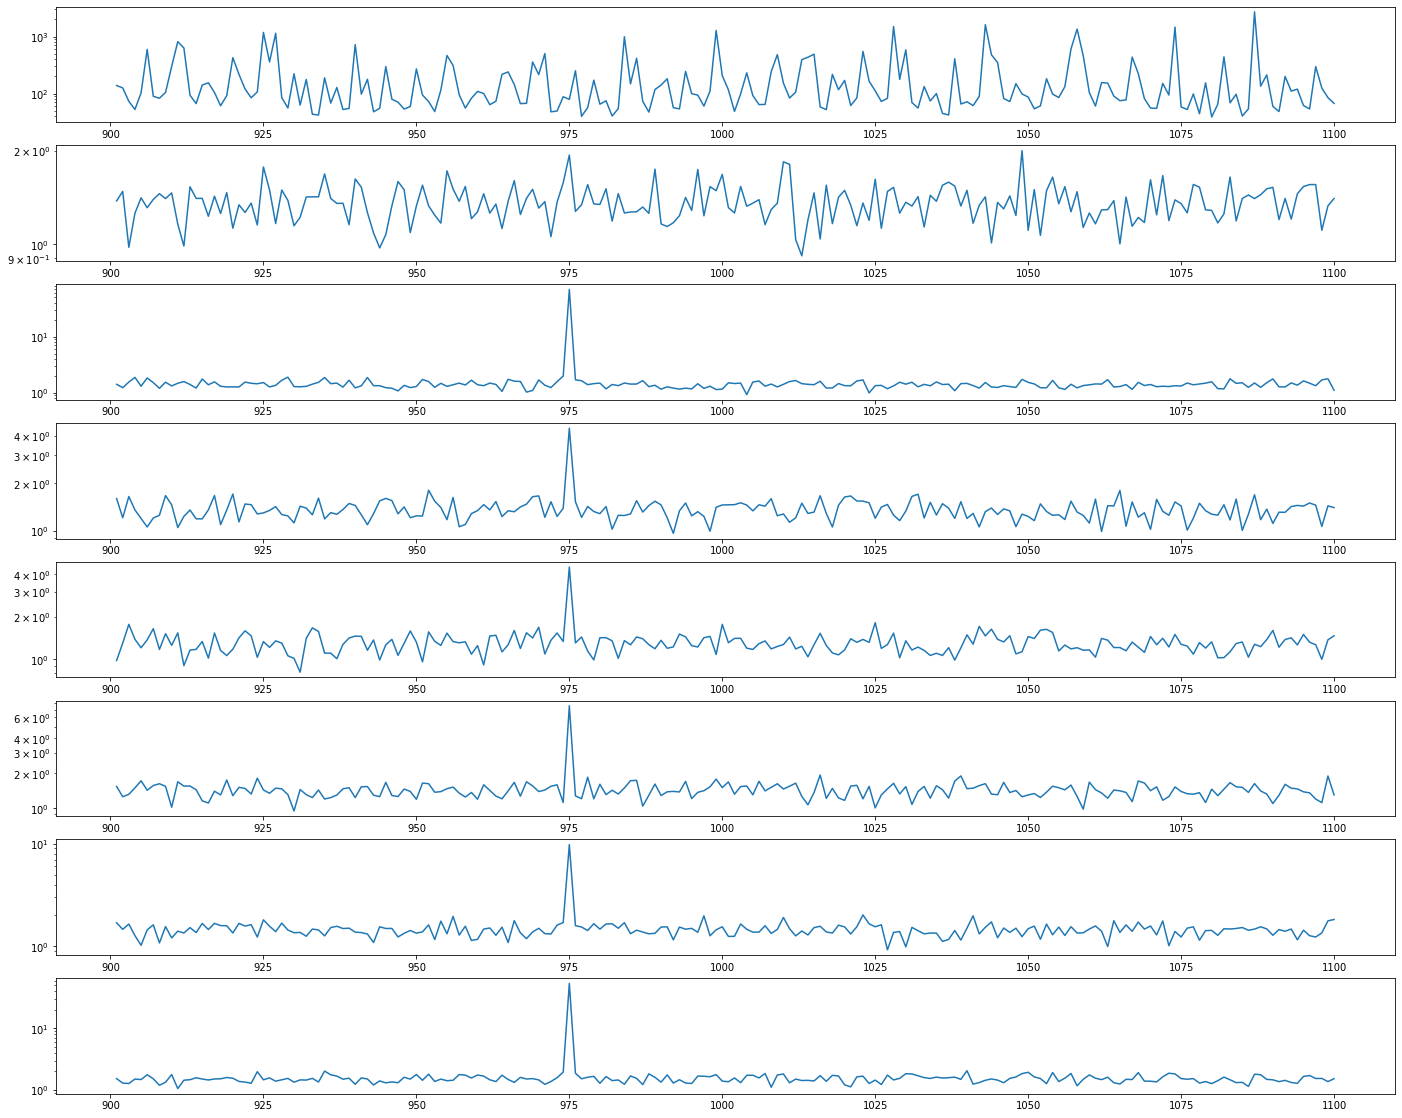

In [135]:
fig, axs = plt.subplots(8, figsize=(24,20))


for ch_index in np.arange(0,8):
    axs[ch_index].semilogy()
    axs[ch_index].plot( freq[freq>0][900:1100], Vfreq[ch_index][freq>0][900:1100] )
    roi = 1.0*Vfreq[ch_index][freq>0][900:1100]
    #print( '%.5e %.5e' % ( np.amax(roi), np.average(roi) + 2*np.std(roi) ) )
    print( '%.5e' % np.amax(roi) )

In [84]:
file.close()